# TEAM ID :PNT2022TMID29843

# FLIGHT DELAY PREDICTION

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='bP5wxi-ibzyiBCx6MzyyuVfvD3zYHuj7UIwNhGB3lccm',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'flightdelay-donotdelete-pr-gpnoxaicl0jjgr'
object_key = 'flightdata.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,14747,SEA,1905,1907.0,2.0,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,13487,MSP,1345,1344.0,-1.0,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,14747,SEA,940,942.0,2.0,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,13487,MSP,819,820.0,1.0,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,11433,DTW,2300,2256.0,-4.0,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [32]:
pd.set_option('display.max_columns', None)
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,14747,SEA,1905,1907.0,2.0,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,13487,MSP,1345,1344.0,-1.0,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,14747,SEA,940,942.0,2.0,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,13487,MSP,819,820.0,1.0,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,11433,DTW,2300,2256.0,-4.0,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [33]:
#Dropping unnecessary columns
data.drop('Unnamed: 25', axis = 1, inplace = True)

In [34]:
#Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [35]:
#Handling missing values
data.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [36]:
#Dropping the missing values
data.dropna(subset=['DEP_TIME','ARR_DELAY'], inplace = True)

In [37]:
data.isnull().sum()

YEAR                   0
QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
UNIQUE_CARRIER         0
TAIL_NUM               0
FL_NUM                 0
ORIGIN_AIRPORT_ID      0
ORIGIN                 0
DEST_AIRPORT_ID        0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
DEP_DEL15              0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
ARR_DEL15              0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
DISTANCE               0
dtype: int64

In [38]:
data.shape

(11043, 25)

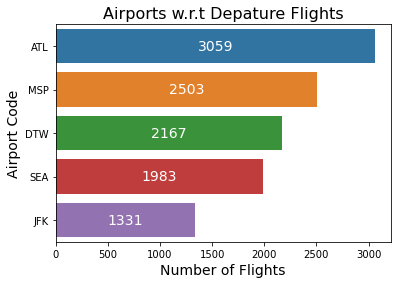

In [39]:
#Data Visualization
ax = sns.countplot(y = data['ORIGIN'], order = data['ORIGIN'].value_counts().index);
ax.set_title("Airports w.r.t Depature Flights", fontsize = 16);
ax.set_xlabel("Number of Flights", fontsize = 14);
ax.set_ylabel("Airport Code", fontsize = 14);
ax.bar_label(ax.containers[0], label_type = 'center', color = 'white', size = 14);

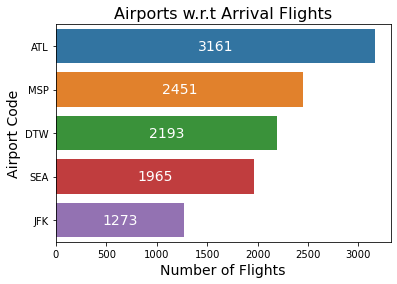

In [40]:
ax = sns.countplot(y = data['DEST'], order = data['DEST'].value_counts().index);
ax.set_title("Airports w.r.t Arrival Flights", fontsize = 16);
ax.set_xlabel("Number of Flights", fontsize = 14);
ax.set_ylabel("Airport Code", fontsize = 14);
ax.bar_label(ax.containers[0], label_type = 'center', color = 'white', size = 14);

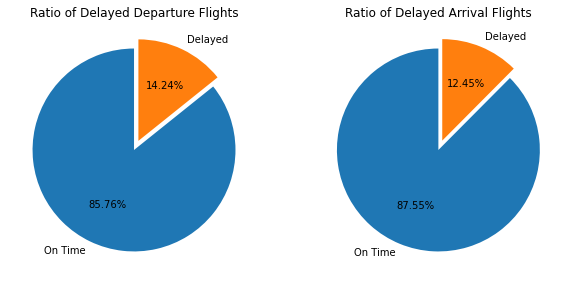

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (10,10))
ax[0].pie(data['DEP_DEL15'].value_counts(), labels = ['On Time', 'Delayed'], autopct = '%1.2f%%',startangle = 90, explode = (0,0.1));
ax[0].title.set_text("Ratio of Delayed Departure Flights");
ax[1].pie(data['ARR_DEL15'].value_counts(), labels = ['On Time','Delayed'], autopct = '%1.2f%%',startangle = 90, explode = (0,0.1));
ax[1].title.set_text("Ratio of Delayed Arrival Flights");

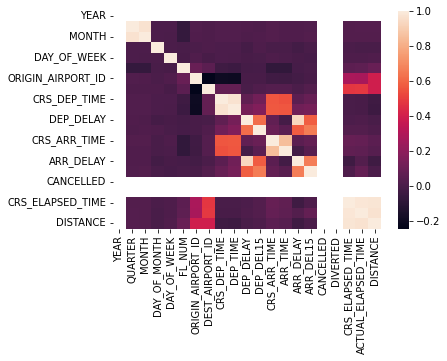

In [42]:
sns.heatmap(data.corr());

In [43]:
new_data = pd.get_dummies(data, columns = ['ORIGIN','DEST'])

In [44]:
new_data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,2016,1,1,1,5,DL,N836DN,1399,10397,14747,1905,1907.0,2.0,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,1,0,0,0,0,0,0,0,0,1
1,2016,1,1,1,5,DL,N964DN,1476,11433,13487,1345,1344.0,-1.0,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,0,1,0,0,0,0,0,0,1,0
2,2016,1,1,1,5,DL,N813DN,1597,10397,14747,940,942.0,2.0,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,1,0,0,0,0,0,0,0,0,1
3,2016,1,1,1,5,DL,N587NW,1768,14747,13487,819,820.0,1.0,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,0,0,0,0,1,0,0,0,1,0
4,2016,1,1,1,5,DL,N836DN,1823,14747,11433,2300,2256.0,-4.0,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,0,0,0,0,1,0,1,0,0,0


# Splitting into independant and dependant values

In [45]:

X = new_data[['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','ORIGIN_ATL','ORIGIN_DTW','ORIGIN_JFK','ORIGIN_MSP','ORIGIN_SEA','DEST_ATL','DEST_DTW','DEST_JFK','DEST_MSP','DEST_SEA','CRS_DEP_TIME','DEP_TIME','DEP_DEL15','CRS_ARR_TIME']]
y = new_data['ARR_DEL15']

In [46]:
X.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,CRS_ARR_TIME
0,1,1,5,1,0,0,0,0,0,0,0,0,1,1905,1907.0,0.0,2143
1,1,1,5,0,1,0,0,0,0,0,0,1,0,1345,1344.0,0.0,1435
2,1,1,5,1,0,0,0,0,0,0,0,0,1,940,942.0,0.0,1215
3,1,1,5,0,0,0,0,1,0,0,0,1,0,819,820.0,0.0,1335
4,1,1,5,0,0,0,0,1,0,1,0,0,0,2300,2256.0,0.0,607


In [47]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ARR_DEL15, dtype: float64

In [48]:
X.shape

(11043, 17)

In [49]:
y.shape

(11043,)

# Splitting into training and testing data

In [51]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# Model Building 

In [52]:

from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(max_depth = 4, min_samples_split = 4, random_state = 25)

In [53]:
#Model Training
dec.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=4, random_state=25)

In [54]:
pred = dec.predict(X_test)

In [55]:
#Model Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.9154844551765772


In [56]:
dec.predict([[1,4,1,0,1,0,0,0,0,0,0,0,1,1215,1236,1,1420]])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1.])

# LINEAR REGRESSION

In [60]:
from sklearn.linear_model import LinearRegression

FDPM=LinearRegression()

FDPM.fit(X_train,y_train)

LinearRegression()

In [61]:
pred=FDPM.predict(X_train)
pred

array([0.02088125, 0.02003636, 0.01474561, ..., 0.03991074, 0.0324346 ,
       0.01011787])

In [62]:
#Saving the model
import pickle
pickle.dump(dec, open('flightdec.pkl','wb'))

In [63]:
pwd

'/home/wsuser/work'

# DEPLOYMENT

In [64]:
!pip install -U ibm-watson-machine-learning

In [65]:
from ibm_watson_machine_learning import APIClient

In [66]:
wml_credentials = {
    "apikey":"A3SrnPK-7Z8jLS9Zlcmmm-B7lFWjGtRjuPmhXXjpCvQM",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [67]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------  ------------------------
ID                                    NAME          CREATED
d520625c-abac-4a5a-aad2-c391174a3c6d  Flight delay  2022-11-15T15:54:36.997Z
------------------------------------  ------------  ------------------------


In [68]:
space_id = "d520625c-abac-4a5a-aad2-c391174a3c6d"

In [69]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [70]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [71]:
MODEL_NAME="Flightdec"
DEPLOYMENT_NAME="dec_deployment"
DEMO_MODEL=dec

In [72]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [73]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [75]:
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [76]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'ARR_DEL15',
  'schemas': {'input': [{'fields': [{'name': 'MONTH', 'type': 'int64'},
      {'name': 'DAY_OF_MONTH', 'type': 'int64'},
      {'name': 'DAY_OF_WEEK', 'type': 'int64'},
      {'name': 'ORIGIN_ATL', 'type': 'uint8'},
      {'name': 'ORIGIN_DTW', 'type': 'uint8'},
      {'name': 'ORIGIN_JFK', 'type': 'uint8'},
      {'name': 'ORIGIN_MSP', 'type': 'uint8'},
      {'name': 'ORIGIN_SEA', 'type': 'uint8'},
      {'name': 'DEST_ATL', 'type': 'uint8'},
      {'name': 'DEST_DTW', 'type': 'uint8'},
      {'name': 'DEST_JFK', 'type': 'uint8'},
      {'name': 'DEST_MSP', 'type': 'uint8'},
      {'name': 'DEST_SEA', 'type': 'uint8'},
      {'name': 'CRS_DEP_TIME', 'type': 'int64'},
      {'name': 'DEP_TIME', 'type': 'float64'},
      {'name': 'DEP_DEL15', 'type': 'float64'},
      {'name': 'CRS_ARR_TIME', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-2